# **Lab 4: integration**
**Jesper Lidbaum**

# **Abstract**

In this report we present 4 methods for approximating integrals. The first, 2-point Gauss quadrature will approximate integrals in the unit interval $[0,1]$. The second will approximate integrals with functions $f : R^2 → R$ over the refrence triangle with vertecies $(0,0)$, $(1,0)$ and $(0,1)$. The third is a Monte Carlo quadrature over the unit interval. The last is a Monte Carlo quadrature over a refrence triangle. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [57]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Jesper Lidbaum (jlidbaum@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need 
additional modules, this is where you add them. 

In [58]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D
import random

# **Introduction**

## Quadrature rules
A general quadrature rule takes the form of an integral over some domain $I$. $\int_I f(\hat{x}) d\hat{x} ≈ \sum_{i=0}^nw_if(x_i)$. The interval, weights, and points are what define the different rules. 

## 2-point Gauss quadrature
The 2-point Gauss quadrature takes the form $\int_If(x)dx ≈ \sum_{i=0}^{1}w_if(x_i)$. We get the weights $w_i$ and points $x_i$ for the interval $[-1,1]$ from example 11.3 in the course book. We can then use a formula from example 11.5 to change the points and weights for the interval $[0,1]$ we get $x_0 = \frac{1 + \sqrt{3}}{2}$ and $x_1 = \frac{1 - \sqrt{3}}{2}$ and $w_0 = w_1 = 1/2$. This quadrature should be exact for cubic polynomials.

## 3-point edge midpoint quadrature
From example 11.5 in the course book we get the weights and points for the quadrature. The points are $(0,1/2)$, $(1/2,1/2)$ and $(1/2,0)$. And weights are all 1/6. This should be exact for quadratic polynomials in 2 variables. 

## Monte carlo quadrature
The Monte Carlo quadrature samples random points from the interval and then weights them all with the size of the domain over the number of points. For our case with the unit interval the quadrature becomes $\int_If(x)dx ≈ \frac{1}{n}\sum_{i=0}^{n}f(X_i)$. Where $X_i$ is a random point in the unit interval.

## Monte Carlo quadrature over reference triangle
The reference triangle domain has a size of $(1*1)/ 2 = 1/2$. This gives us the quadrature rule $\int_{Triangle}f(\hat{x})d\hat{x} ≈ \frac{1}{2n}\sum_{i=0}^{n}f((X_i, Y_i))$. To sample the points $X_i, Y_i$ we first sample two points in the unit interval. This gives us a point in the reference square. We can then fold all points that are outside the reference triangle back into it by reflecting them along the line $y = 1 - x$. So if $X_i + Y_i > 1$ we set $X_i \gets 1-Y_i$ and $Y_i \gets 1-X_i$. This gives a uniform distribution of points in the triangle.


# **Method**
Here we present code for the 3 different methods.

## 2-point Gauss quadrature
We use the sum mentioned in the introduction to construct the sum for the quadrature.

In [59]:
def point_2_gauss_quadrature(f):
    X0 = (1.0/np.sqrt(3) + 1.0) / 2.0
    X1 = (1.0 - 1.0/np.sqrt(3)) / 2.0
    return (f(X0) + f(X1)) / 2.0

## 3-point edge midpoint quadrature
We use the points and weights gained from example 11.5 in the course book to construct the sum.


In [60]:
def quardature_refrence_triangle(f):
    w = 1/6
    return w * (f(1.0/2.0, 0) + f(1.0 / 2.0, 1.0 / 2.0) + f(0, 1.0/2.0))

## Monte carlo quadrature
We use Python's uniform sampling to sample points from the unit interval. We also have $n$, the number of points as an input parameter.

In [61]:
def mc_integration(f, n):
    sum = 0
    for i in range(n):
        sum += f(random.uniform(0, 1))
    return sum / n  

## Monte Carlo quadrature over reference triangle
We use the method from the introduction to sample uniform points in a triangle and construct the sum.

In [62]:
def mc_integration_refrence_triangle(f, n):
    sum = 0
    for i in range(n):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        if(x + y > 1):
            tmp = x
            x = 1 - y
            y = 1 - tmp
            sum += f(x, y)
        else:
            sum += f(x, y)
    return sum / n

# **Results**
In this part, we present the results from the tests of the different methods.

In [63]:
test_amount = 10


## 2-point Gauss quadrature
We test against some cubic polynomials. And if we get an exact solution. We can see that the errors are always zero.

In [64]:
def test_point_2_gauss_quadrature(a, b, c, d):
    f = lambda x: a * x**3 + b * x**2 + c*x + d
    F = lambda x: a * x**4 / 4 + b * x**3 / 3 + c * x**2 / 2 + d * x
    return np.abs(F(1) - point_2_gauss_quadrature(f))


for i in range(test_amount):
    a = random.uniform(-10, 10)
    b = random.uniform(-10, 10)
    c = random.uniform(-10, 10)
    d = random.uniform(-10, 10)
    print("a = " + str(a) + ", b = " + str(b) + ", c = " + str(c) + ", d = " + str(d))
    print("Error: " + str(test_point_2_gauss_quadrature(a, b, c, d)))

a = -4.57368301314353, b = -5.082872509270382, c = -8.062533135803749, d = 7.265984349930282
Error: 0.0
a = -1.4116037851332628, b = -8.624743401370454, c = -6.698610446485991, d = -7.026240252697615
Error: 0.0
a = -8.953469974283587, b = 8.011520366779404, c = -7.968290774284988, d = 6.302961697570172
Error: 0.0
a = -4.485340826562103, b = -4.48344773399411, c = 8.733717982586917, d = -0.787108303164807
Error: 6.661338147750939e-16
a = 9.57566492492165, b = -3.2385195183665267, c = 5.926656733573125, d = 5.432986319934576
Error: 0.0
a = -6.9481762351198935, b = 4.67147537734548, c = 7.815033588297972, d = 2.0129077583662287
Error: 8.881784197001252e-16
a = 9.604716526409938, b = -4.659392947733581, c = 5.582578299248254, d = -7.7666640729686005
Error: 8.881784197001252e-16
a = 8.461924608368555, b = 3.5380570561361218, c = -4.174028059396537, d = 6.472532341022593
Error: 0.0
a = -0.28134427291412756, b = 4.808279288801083, c = 0.5195763992795364, d = 1.9894969326829344
Error: 4.440892

## 3-point edge midpoint quadrature
We test some quadratic polynomials against the exact solution. Integrating $ax^2 + by^2 + cxy + dx + ey + f$ by hand gives the exact solution $(2a + 2b + c + 4d + 4e + 12f)/24$. We can see that the errors are always zero.

In [65]:
def test_quardature_refrence_triangle(a, b, c, d, e, f):
    g = lambda x, y: a * x**2 + b * y**2 + c * x * y + d * x + e * y + f
    exact = (2.0 * a + 2.0 * b + c + 4.0 * d + 4.0 * e + 12.0 * f)/24.0

    return np.abs(exact - quardature_refrence_triangle(g))


for i in range(test_amount):
    a = random.uniform(-10, 10)
    b = random.uniform(-10, 10)
    c = random.uniform(-10, 10)
    d = random.uniform(-10, 10)
    e = random.uniform(-10, 10)
    f = random.uniform(-10, 10)
    print("a = " + str(a) + ", b = " + str(b) + ", c = " + str(c) + ", d = " + str(d) + ", e = " + str(e) + ", f = " + str(f))
    print("Error: " + str(test_quardature_refrence_triangle(a, b, c, d, e, f)))

a = -7.682307902035339, b = 1.3730159337824333, c = -4.6712292091801615, d = 4.823340753121437, e = -8.110019773490638, f = 8.031610316414689
Error: 4.440892098500626e-16
a = 1.169781959548251, b = 9.360166465341358, c = 1.148785227451226, d = -3.2939225904689806, e = 2.178870597004474, f = -6.017030093445472
Error: 4.440892098500626e-16
a = -7.272643722046171, b = 4.280676057680049, c = 2.4274094525934586, d = 4.924642311686609, e = -3.128748620300927, f = -4.522296246936235
Error: 0.0
a = 2.315998525582348, b = 7.989019366249565, c = -7.839637313116679, d = -8.588750555798129, e = 8.797686095815255, f = -9.446291827101991
Error: 0.0
a = -6.122049902801323, b = -3.8334217537527415, c = -7.339160809043359, d = -6.173112401681033, e = -9.707809149131387, f = 1.645512918935573
Error: 0.0
a = -7.0753294291878905, b = -6.17760552400118, c = 6.904172607633438, d = 4.220515892138806, e = 7.128071164386817, f = 6.5330462728958985
Error: 8.881784197001252e-16
a = 6.311885204986101, b = -2.3073

## Monte carlo quadrature
We test the rate of convergence for the quadrature against $\frac{1}{\sqrt{n}}$. We can see that the errors seem to follow the same curve.

Text(0.5, 1.0, 'Errors from real value and f(x)=1/sqrt(x)')

<Figure size 432x288 with 0 Axes>

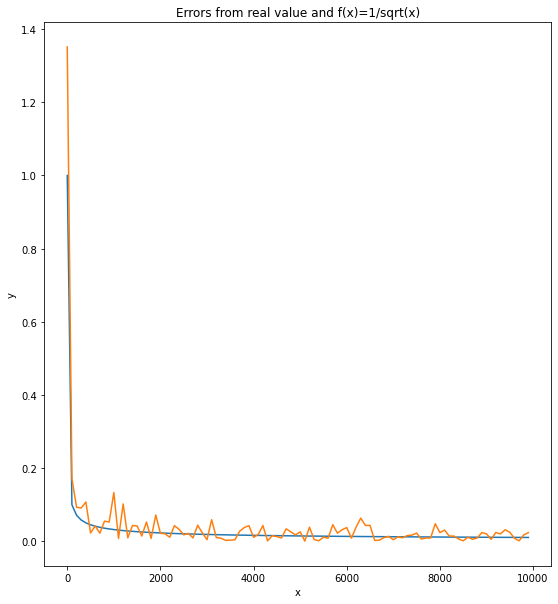

In [66]:
def test_mc_integration(a, b, c, d):
    f = lambda x: a * x**3 + b * x**2 + c*x + d
    F = lambda x: a * x**4 / 4 + b * x**3 / 3 + c * x**2 / 2 + d * x

    points = []
    errors = []

    for i in range(1, 10000, 100):
        points.append(1/np.sqrt(i))
        errors.append(np.abs(F(1) - mc_integration(f, i)))

    return points, errors


t = np.arange(1, 10000, 100)
points, errors = test_mc_integration(1,2,3,4)
plt.figure(1)
plt.figure(figsize=(20, 10))

# Define a subplot structure and choose the first subplot 
plt.subplot(121)

# Plot a standard NumPy function against the parameter t
plt.plot(t,points)
plt.plot(t, errors)

# Set plot labels and title for the subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Errors from real value and f(x)=1/sqrt(x)')

## Monte Carlo quadrature over reference triangle
We test the rate of convergence for the quadrature against $\frac{1}{\sqrt{n}}$. We can see that the errors seem to follow the same curve.

Text(0.5, 1.0, 'Errors from real value and f(x)=1/sqrt(x)')

<Figure size 432x288 with 0 Axes>

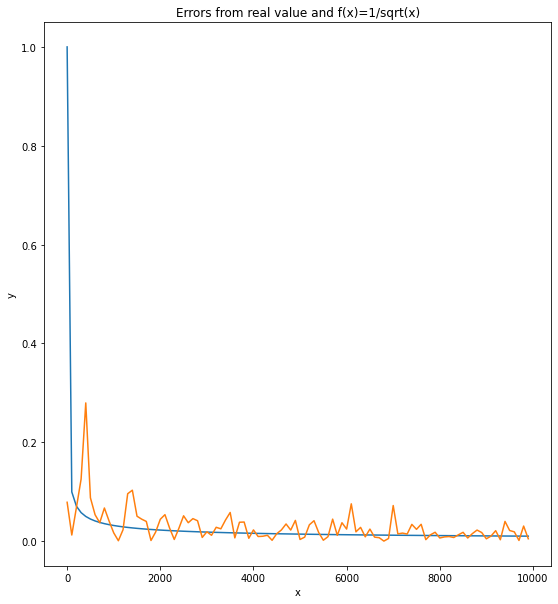

In [67]:
def test_mc_integration_refrence_triangle(a, b, c, d):
    g = lambda x, y: a * x**2 + b * y**2 + c * x * y + d * x + e * y + f
    exact = (2.0 * a + 2.0 * b + c + 4.0 * d + 4.0 * e + 12.0 * f)/24.0

    points = []
    errors = []

    for i in range(1, 100, 3):
        points.append(1/np.sqrt(i))
        errors.append(np.abs(exact - mc_integration_refrence_triangle(g, i)))

    return points, errors


t2 = np.arange(1, 10000, 100)
points2, errors2 = test_mc_integration(1,2,3,4)
plt.figure(2)
plt.figure(figsize=(20, 10))

# Define a subplot structure and choose the first subplot 
plt.subplot(122)

# Plot a standard NumPy function against the parameter t
plt.plot(t2, points2)
plt.plot(t2, errors2)

# Set plot labels and title for the subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Errors from real value and f(x)=1/sqrt(x)')


# **Discussion**

For the triangle and unit interval quadratures, we could see that the solution was exact. This could have implications for example when constructing parabolas for simulation of Hookes law or a throwing parabola. The Monte Carlo rules were easy to implement for two different domains which show that this method could be easy to use for many purposes. 

A possible improvement for showing the errors could be a loglog plot. This would show differences from the real curve more.